# RQ1 Emissions Reporting Analysis

This script contains the analysis for the RQ1 Emissions Reporting Analysis for the 'What is the Carbon Footprint of ML Models on
Hugging Face? A Repository Mining Study' paper. The analysis can be replicated by executing the cells in order, please make sure the dataset referenced in read_df_processed is in the corresponding directory.

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import ast


pd.options.mode.chained_assignment = None

In [2]:
def read_df_processed():
    df = pd.read_csv('../../datasets/HFTotalProcessed.csv')
    df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
    df['library_name'] = df['library_name'].apply(lambda libraries:  ast.literal_eval(libraries) if not isinstance(libraries, list) else libraries)
    df['datasets'] = df['datasets'].apply(lambda datasets: [''] if pd.isnull(datasets) else [datasets] if '[' not in datasets else ast.literal_eval(datasets))

    return df

df = read_df_processed()


# Set to true if you want latex-style in the plots
latex = False

if latex:
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

/tmp/ipykernel_40691/3999598075.py:2: DtypeWarning: Columns (6,7,8,9,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../datasets/HFTotalProcessed.csv')


In [3]:
width_in = 252/72.27

def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    
    return (fig_width_in, fig_height_in)


### Is the energy consumption reporting increasing?

In [4]:
df = read_df_processed()

/tmp/ipykernel_40691/3999598075.py:2: DtypeWarning: Columns (6,7,8,9,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../datasets/HFTotalProcessed.csv')


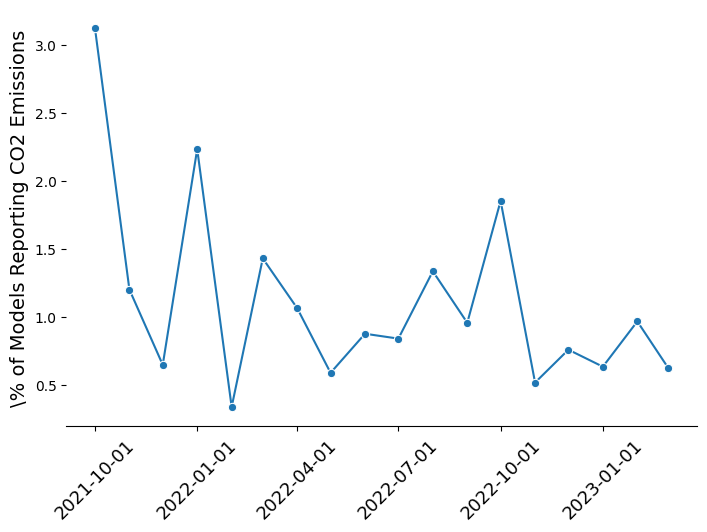

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

xtick_interval = 3

df['year_month'] = pd.to_datetime(df['year_month'])
grouped_data = df.groupby('year_month').agg({'co2_reported': 'sum', 'modelId': 'count'}).reset_index().iloc[34:,:]

# Calculate the ratio of models reporting CO2 emissions over the total number of models
grouped_data['co2_reporting_ratio'] = (grouped_data['co2_reported'] / grouped_data['modelId']) * 100

#only considering up to 31st march
grouped_data = grouped_data.iloc[:-1]

# Plot the evolution of the ratio of models reporting CO2 emissions over the total number of models
plt.figure(figsize=(set_size(516)[0]+1, set_size(516)[1]+1))
ax = sns.lineplot(data=grouped_data, x='year_month', y='co2_reporting_ratio', marker='o')
xticks = grouped_data['year_month'][::xtick_interval]
xticks = xticks.dt.strftime('%Y-%m')  # Convert Timestamp objects to strings
ax.set_ylabel('\% of Models Reporting CO2 Emissions', fontsize=14)
ax.set_xticks(xticks)
ax.set_xlabel(None)
plt.xticks(rotation=45, fontsize=13)


ax.grid(False)

sns.despine(left=True, bottom=False)
plt.show()


#### Applying linear regression

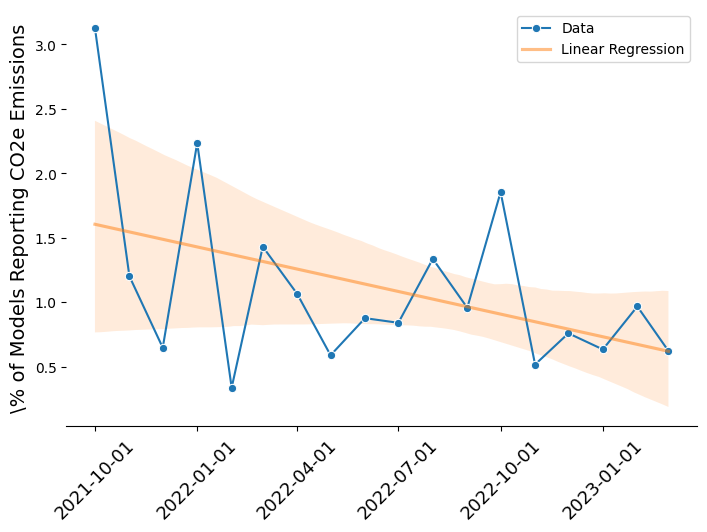

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df['year_month'] = pd.to_datetime(df['year_month'])
grouped_data = df.groupby('year_month').agg({'co2_reported': 'sum', 'modelId': 'count'}).reset_index().iloc[34:,:]

# Calculate the ratio of models reporting CO2 emissions over the total number of models
grouped_data['co2_reporting_ratio'] = (grouped_data['co2_reported'] / grouped_data['modelId']) * 100

# Convert datetime objects to numerical values
ref_date = pd.Timestamp('1970-01-01')
grouped_data['year_month_num'] = (grouped_data['year_month'] - ref_date) / pd.Timedelta(1, 'D')

# only considering up to 31st march
grouped_data = grouped_data.iloc[:-1]

# Plot the evolution of the ratio of models reporting CO2 emissions over the total number of models
plt.figure(figsize=(set_size(516)[0]+1, set_size(516)[1]+1))
ax = sns.lineplot(data=grouped_data, x='year_month', y='co2_reporting_ratio', marker='o', label='Data')
sns.regplot(data=grouped_data, x='year_month_num', y='co2_reporting_ratio', scatter=False, label='Linear Regression', ax=ax, line_kws={'alpha': 0.5})

ax.set_ylabel('\% of Models Reporting CO2e Emissions', fontsize=14)
xticks = grouped_data['year_month'][::xtick_interval]
xticks = xticks.dt.strftime('%Y-%m')  # Convert Timestamp objects to strings
ax.set_xticks(xticks)
ax.set_xlabel(None)
plt.xticks(rotation=45, fontsize=13)
ax.grid(False)
sns.despine(left=True, bottom=False)
plt.legend()
# plt.savefig('carbon_emissions_reporting_evolution.pdf', bbox_inches='tight')
plt.show()


In [7]:
# Maximum CO2 reporting percentage
max_reporting_ratio = grouped_data['co2_reporting_ratio'].max()
print(f"Maximum CO2 reporting percentage: {max_reporting_ratio:.2f}%")

# Overall CO2 reporting percentage
overall_reporting_ratio = grouped_data['co2_reported'].sum() / grouped_data['modelId'].sum()
print(f"Overall CO2 reporting percentage: {overall_reporting_ratio * 100:.2f}%")

# Last month CO2 reporting percentage
last_month_reporting_ratio = grouped_data.iloc[-1]['co2_reporting_ratio']
print(f"Last month CO2 reporting percentage: {last_month_reporting_ratio :.2f}%")

# Median CO2 reporting percentage
median_reporting_ratio = grouped_data['co2_reporting_ratio'].median()
print(f"Median CO2 reporting percentage: {median_reporting_ratio:.2f}%")

Maximum CO2 reporting percentage: 3.12%
Overall CO2 reporting percentage: 0.90%
Last month CO2 reporting percentage: 0.62%
Median CO2 reporting percentage: 0.92%


In [8]:
import numpy as np
import statsmodels.api as sm

# Create a new column with the index number (time) as a numeric variable
grouped_data['time'] = np.arange(len(grouped_data))

# Define the dependent variable (y) and independent variable (X)
y = grouped_data['co2_reporting_ratio']
X = grouped_data['time']

# Add a constant to the independent variable (X)
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X)
results = model.fit()

# Get the p-value for the slope coefficient (β1)
p_value_slope = results.pvalues['time']


Remember, these p-values still should be corrected!! Correction on HFGeneralAnalysis.ipynb

In [9]:
p_value_slope

0.06421334222939966

### Is the energy consumption reported increasing?

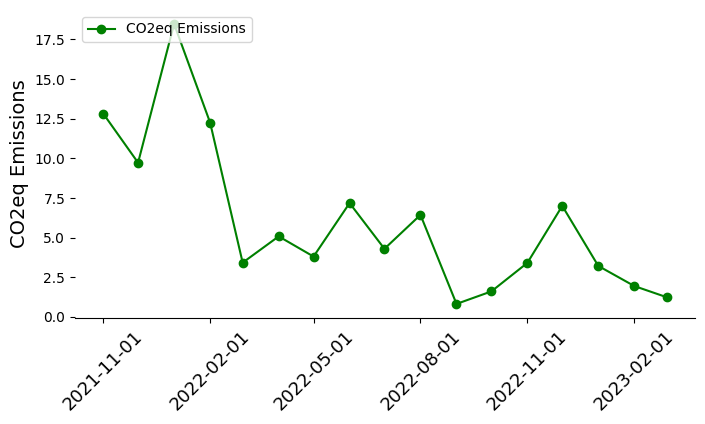

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Group the data by 'year_month' and compute median values for the relevant columns
grouped_df = df.groupby('year_month').agg({
    'co2_eq_emissions': 'median',
}).reset_index()

# Convert 'year_month' to datetime format
grouped_df['year_month'] = pd.to_datetime(grouped_df['year_month'])

# Filter rows to start at the end of 2021
start_date = pd.to_datetime('2021-11')
filtered_df = grouped_df[grouped_df['year_month'] >= start_date]

# up to march 31st
filtered_df = filtered_df.iloc[:-1]

xtick_interval = 3
xticks = filtered_df['year_month'][::xtick_interval]

# Plot the evolution of average CO2eq emissions, model size, and performance
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(filtered_df['year_month'], filtered_df['co2_eq_emissions'], 'g-o', label='CO2eq Emissions')  # Add 'o' as marker
ax.set_ylabel('CO2eq Emissions', fontsize=14)
ax.set_xticks(xticks)
plt.xticks(rotation=45, fontsize=13)
ax.legend(loc='upper left')

ax.grid(False)
sns.despine(left=True, bottom=False) 
# plt.savefig('energy_consumption_evolution.pdf', bbox_inches='tight')
plt.show()


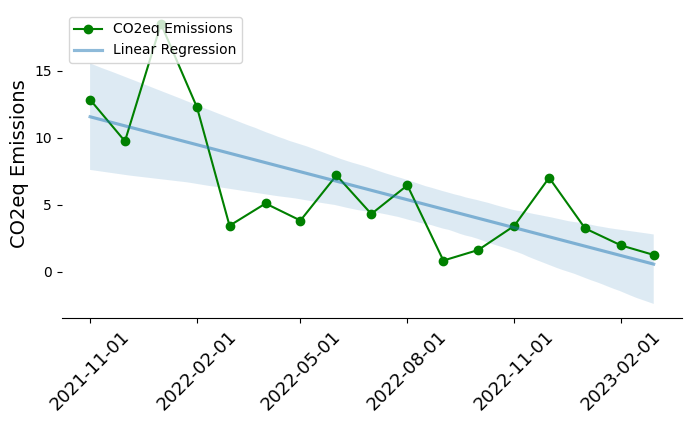

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Group the data by 'year_month' and compute median values for the relevant columns
grouped_df = df.groupby('year_month').agg({
    'co2_eq_emissions': 'median',
}).reset_index()

# Convert 'year_month' to datetime format
grouped_df['year_month'] = pd.to_datetime(grouped_df['year_month'])

# Filter rows to start at the end of 2021
start_date = pd.to_datetime('2021-11')
filtered_df = grouped_df[grouped_df['year_month'] >= start_date]

# Convert datetime objects to numerical values
ref_date = pd.Timestamp('1970-01-01')
filtered_df['year_month_num'] = (filtered_df['year_month'] - ref_date) / pd.Timedelta(1, 'D')

filtered_df = filtered_df.iloc[:-1]

xtick_interval = 3
xticks = filtered_df['year_month'][::xtick_interval]

# Plot the evolution of average CO2eq emissions, model size, and performance
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(filtered_df['year_month'], filtered_df['co2_eq_emissions'], 'g-o', label='CO2eq Emissions')  # Add 'o' as marker
sns.regplot(data=filtered_df, x='year_month_num', y='co2_eq_emissions', scatter=False, label='Linear Regression', ax=ax, line_kws={'alpha': 0.5})

ax.set_xlabel(None)
ax.set_ylabel('CO2eq Emissions', fontsize=14)
ax.set_xticks(xticks)
plt.xticks(rotation=45, fontsize=13)
ax.legend(loc='upper left')

ax.grid(False)
sns.despine(left=True, bottom=False) 
# plt.savefig('carbon_emissions_evolution.pdf', bbox_inches='tight')
plt.show()


In [12]:
# Maximum CO2 reporting percentage
max_reported = filtered_df['co2_eq_emissions'].max()
print(f"Maximum CO2 reported: {max_reported:.2f}")

# Overall CO2 reporting percentage
overall_reported = filtered_df['co2_eq_emissions'].sum() / filtered_df.shape[0]
print(f"Overall CO2 reported: {overall_reported:.2f}")

# Last month CO2 reporting percentage
last_month_reported = filtered_df.iloc[-1]['co2_eq_emissions']
print(f"Last month CO2 reported: {last_month_reported:.2f}")

# Median CO2 reporting percentage
median_reported = filtered_df['co2_eq_emissions'].median()
print(f"Median CO2 reported: {median_reported:.2f}")

Maximum CO2 reported: 18.48
Overall CO2 reported: 6.04
Last month CO2 reported: 1.24
Median CO2 reported: 4.30


In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime

filtered_df['time'] = np.arange(len(filtered_df))


# Perform linear regression
X = sm.add_constant(filtered_df['time'])
y = filtered_df['co2_eq_emissions']
model = sm.OLS(y, X).fit()

# Obtain the p-value for the slope (the second element in model.pvalues)
slope_pvalue = model.pvalues[1]

Remember, these p-values still should be corrected!! Correction on HFGeneralAnalysis.ipynb

In [14]:
print(f"Slope p-value: {slope_pvalue}")

Slope p-value: 0.0010268592930073807


# Domain analysis on carbon emissions reporting models

In [15]:
df_energy_reported = df[df['co2_reported'] == True]

/tmp/ipykernel_40691/3578325700.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_energy_reported['period'] = df_energy_reported['created_at'].dt.to_period('Q')


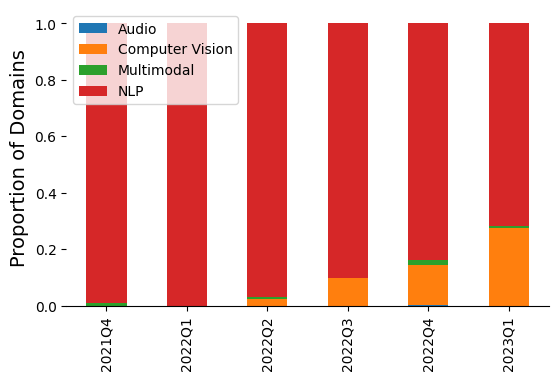

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create a 'period' column to group by every 3 months
df_energy_reported['created_at'] = pd.to_datetime(df_energy_reported['created_at'])
df_energy_reported['period'] = df_energy_reported['created_at'].dt.to_period('Q')

# Calculate domain counts for each period
domain_counts = df_energy_reported.groupby('period')['domain'].apply(lambda x: x.explode().value_counts()).unstack(fill_value=0)

# Normalize the counts to get proportions
domain_proportions = domain_counts.div(domain_counts.sum(axis=1), axis=0).iloc[2:-1]

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=set_size(450))
domain_proportions.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('Proportion of Domains', fontsize=14)
ax.set_xlabel(None)


plt.legend(loc='upper left')
sns.set(style='whitegrid')

if latex:
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })

sns.despine(left=True, bottom=False) 
# plt.savefig('domain_evolution_energy.pdf', bbox_inches='tight')
plt.show()



/tmp/ipykernel_40691/988622938.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['period'] = df['created_at'].dt.to_period('Q')


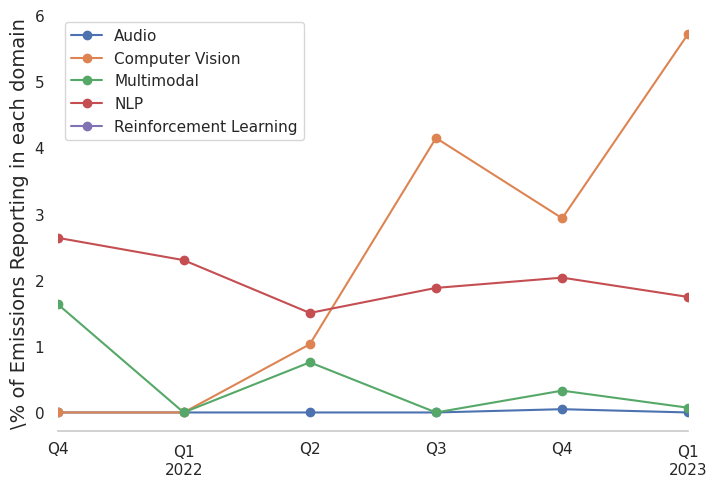

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 'period' column to group by every 3 months
df['created_at'] = pd.to_datetime(df['created_at'])
df['period'] = df['created_at'].dt.to_period('Q')

# Calculate domain counts for each period
total_domain_counts = df.groupby('period')['domain'].apply(lambda x: x.explode().value_counts()).unstack(fill_value=0)
energy_domain_counts = df[df['co2_reported']==True].groupby('period')['domain'].apply(lambda x: x.explode().value_counts()).unstack(fill_value=0)

# Calculate the proportion of models in each domain reporting carbon emissions
domain_proportions = energy_domain_counts.div(total_domain_counts).iloc[13:-1]*100

# Plot the line plot
fig, ax = plt.subplots(figsize=(set_size(516)[0]+1, set_size(516)[1]+1))
domain_proportions.plot(ax=ax, marker='o')
ax.set_ylabel('\% of Emissions Reporting in each domain', fontsize=14)
ax.set_xlabel(None)

ax.grid(False)


plt.legend(loc='upper left')
sns.set(style='whitegrid')

if latex:
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
    })


sns.despine(left=True, bottom=False) 
# plt.savefig('evolution_energy_percentage_inside_domain.pdf', bbox_inches='tight')
plt.show()


In [18]:
df[df['co2_reported']==True]['domain'].value_counts()

domain
NLP                1160
Computer Vision     188
Multimodal           11
Audio                 1
Name: count, dtype: int64

In [19]:
df = read_df_processed()

/tmp/ipykernel_40691/3999598075.py:2: DtypeWarning: Columns (6,7,8,9,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../datasets/HFTotalProcessed.csv')


## Energy reporting classification

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function to determine if a model is optimized
def is_optimized(tags):
    optimization_tags = ['optimized', 'pruned', 'distilled']
    return any(tag in tags for tag in optimization_tags)

# Classify the models based on energy reporting and optimization
def classify_model(row):
    tags = [col for col in row.index if col.startswith('is_')]
    if not row['co2_reported']:
        if pd.notnull(row['hardware_used']):
            return 'Context Reporting'
        else:
            return 'Unknown Energy Efficiency'
    elif row['co2_reported'] and not (pd.notna(row['hardware_used'])):
        return 'Basic Energy Reporting'
    elif row['co2_reported'] and pd.notna(row['hardware_used']):
        return 'Energy Awareness'
    elif row['co2_reported'] and is_optimized(tags):
        return 'Energy Optimization'
    elif row['co2_reported'] and is_optimized(tags) and 'EcoCard' in tags:
        return 'Certified Energy Efficiency'
    else:
        return 'Unknown Energy Efficiency'

df['energy_classification'] = df.apply(classify_model, axis=1)


Modify the code below to check top 5 models in each category

In [21]:
category = 'Energy Awareness'
df[df['energy_classification'] == category].sort_values(by='likes', ascending=False).head(5)

,modelId,datasets,datasets_size,co2_eq_emissions,source,training_type,geographical_location,hardware_used,accuracy,loss,...,is_gptj,is_llama,is_lora,is_ml-agents-soccertwos,is_ppo,is_pyramids,is_setfit,is_snowballtarget,is_swin,energy_classification
44012,bloom,[],NaN,24700000.0,"Estimating the Carbon Footprint of BLOOM, a 17...",pre-training,"Orsay, France",384 A100 80GB GPUs,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Energy Awareness
12995,dalle-mini,[],NaN,7540.0,MLCo2 Machine Learning Impact calculator,NaN,East USA,TPU v3-8,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Energy Awareness
32,distilgpt2,[openwebtext],3.976949e+10,149200.0,NaN,NaN,"** unavailable, assumed East US for calculations",** 8 16GB V100,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Energy Awareness
53351,dalle-mega,[],NaN,450300.0,MLCo2 Machine Learning Impact calculator,NaN,East USA,TTPU v3-256,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Energy Awareness
154076,swissbert,[],NaN,0.6,NaN,NaN,NaN,RTX 2080 Ti.,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Energy Awareness


In [22]:
df[['auto', 'energy_classification']].value_counts()

auto   energy_classification    
False  Unknown Energy Efficiency    168800
True   Basic Energy Reporting         1291
False  Context Reporting               194
       Energy Awareness                 79
True   Unknown Energy Efficiency        51
False  Basic Energy Reporting           47
Name: count, dtype: int64

In [23]:
df['energy_classification'].value_counts()

energy_classification
Unknown Energy Efficiency    168851
Basic Energy Reporting         1338
Context Reporting               194
Energy Awareness                 79
Name: count, dtype: int64